In [ ]:
#Mount drive for reading csv
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Import Dependencies
%matplotlib inline

# Begin Python Imports
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

# Data Manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
# Install necessary libraries if not already installed
!pip install -U ydata-profiling[notebook]==4.0.0 matplotlib==3.5.1

a.1.: Derive log returns from the raw stock price dataset

In [ ]:
import pandas as pd
import numpy as np

# Load the stock price data with date column
price_data = pd.read_csv("/content/gdrive/MyDrive/IS 733 Data Mining/Homework/3/data/SP500_close_price_no_missing.csv", parse_dates=['date'], index_col='date')


# Calculate log returns for each stock
log_returns = np.log(price_data / price_data.shift(1))

# Drop the first row as it will have NaN values after shifting
log_returns = log_returns.dropna()

# Display the resulting DataFrame
print(log_returns.head())

                 MMM       ACE       ABT       ANF      ADBE       AMD  \
date                                                                     
2011-01-04 -0.001384 -0.000643  0.009366 -0.031688  0.007006  0.034806   
2011-01-05  0.000000 -0.003382  0.000000 -0.015596  0.022282  0.015837   
2011-01-06 -0.006134 -0.004365 -0.002074 -0.033434  0.001551 -0.025001   
2011-01-07  0.001044 -0.007481  0.004143  0.000747 -0.007153  0.015982   
2011-01-10  0.010613 -0.013145 -0.008930  0.012429  0.028310  0.039961   

                 AES       AET       AFL         A       APD       ARG  \
date                                                                     
2011-01-04  0.004773  0.005141 -0.018417 -0.009356 -0.014912 -0.001574   
2011-01-05  0.013402  0.009569 -0.001949 -0.002172 -0.004382 -0.000788   
2011-01-06  0.017081  0.018557 -0.005514  0.001931 -0.005194  0.003462   
2011-01-07  0.000000  0.002179 -0.003931  0.003369  0.001810 -0.000157   
2011-01-10 -0.001541  0.001864 -0.012

a.2.: Plot a scree plot which shows the distribution of variance contained in subsequent principal components sorted by their eigenvalues.

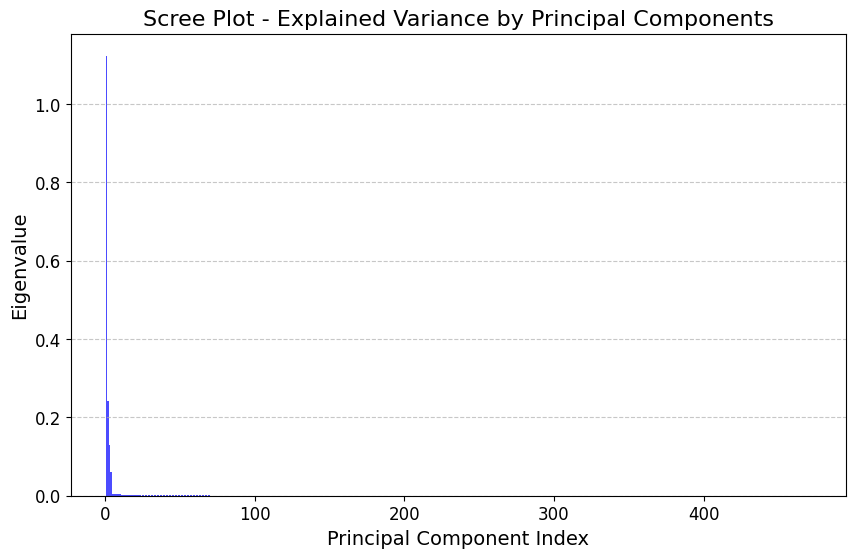

In [ ]:
import matplotlib.pyplot as plt

# Continue from the previous code
# Calculate covariance matrix
cov_matrix = log_returns.cov()

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Plot scree plot with proper formatting
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, color='blue', alpha=0.7)
plt.xlabel('Principal Component Index', fontsize=14)
plt.ylabel('Eigenvalue', fontsize=14)
plt.title('Scree Plot - Explained Variance by Principal Components', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


a.3: Create a second plot showing cumulative variance retained if top N components are kept after dimensionality reduction (i.e. the horizontal axis will show the number of components kept, the vertical axis will show the cumulative percentage of variance retained).


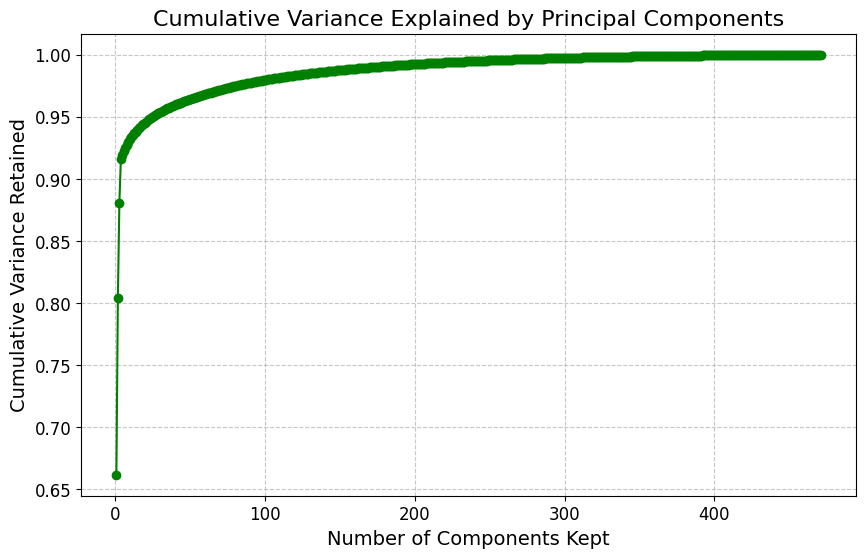

In [ ]:
# Calculate cumulative explained variance
cumulative_var_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Plot cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o', linestyle='-', color='green')
plt.xlabel('Number of Components Kept', fontsize=14)
plt.ylabel('Cumulative Variance Retained', fontsize=14)
plt.title('Cumulative Variance Explained by Principal Components', fontsize=16)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



a.4.: How many principal components must be retained in order to capture at least 80% of the total variance in data?

In [ ]:
# Set the desired cumulative variance threshold (e.g., 80%)
desired_cumulative_variance = 0.8

# Find the index where cumulative variance exceeds or equals the threshold
num_components_for_threshold = np.argmax(cumulative_var_ratio >= desired_cumulative_variance) + 1

print(f"Number of components to retain {desired_cumulative_variance * 100}% of variance: {num_components_for_threshold}")


Number of components to retain 80.0% of variance: 2


###1.b. Analysis of principal components and weights.

1.b.1.: Compute and plot the time series of the 1st principal component and observe temporal patterns. Identify the date with the lowest value for this component and conduct a quick research on the Internet to see if you can identify event(s) that might explain the observed behavior.

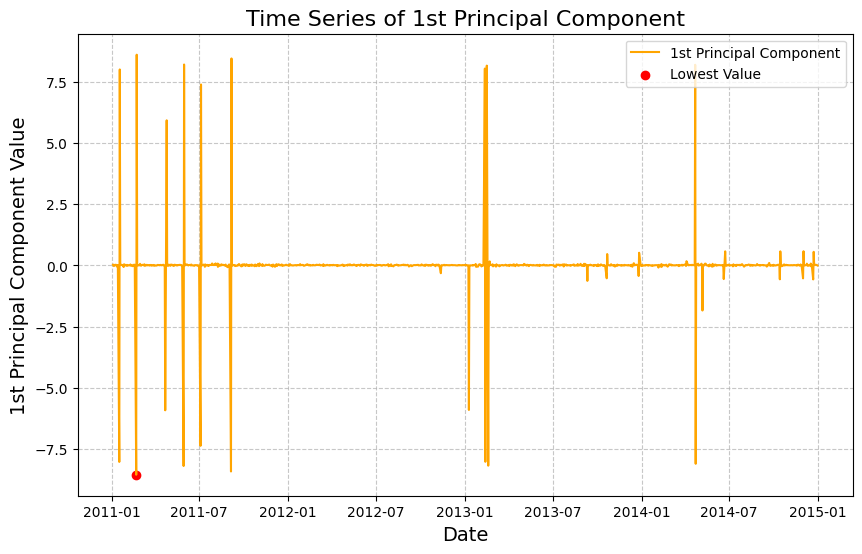

Date with the lowest value for the 1st principal component: 2011-02-21 00:00:00
Value: -8.548890024971792


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reload the dataset
price_data = pd.read_csv("/content/gdrive/MyDrive/IS 733 Data Mining/Homework/3/data/SP500_close_price_no_missing.csv", parse_dates=['date'], index_col='date')

# Calculate log returns for each stock
log_returns = np.log(price_data / price_data.shift(1))
log_returns = log_returns.dropna()

# Number of principal components to retain (use the previously determined value)
num_components_to_retain = num_components_for_threshold

# Fit PCA model with the desired number of components
pca = PCA(n_components=num_components_to_retain)
principal_components = pca.fit_transform(log_returns)

# Get the time series of the 1st principal component
pc1_timeseries = principal_components[:, 0]

# Make sure the indices match between log_returns and pc1_timeseries
common_index = log_returns.index.intersection(price_data.index)
log_returns = log_returns.loc[common_index]

# Find the index of the minimum value in the 1st principal component time series
min_index = np.argmin(pc1_timeseries)

# Get the date and value corresponding to the minimum value
min_date = common_index[min_index]
min_value = pc1_timeseries[min_index]

# Plot the time series of the 1st principal component
plt.figure(figsize=(10, 6))
plt.plot(common_index, pc1_timeseries, color='orange', label='1st Principal Component')
plt.scatter(min_date, min_value, color='red', label='Lowest Value')
plt.xlabel('Date', fontsize=14)
plt.ylabel('1st Principal Component Value', fontsize=14)
plt.title('Time Series of 1st Principal Component', fontsize=16)
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

print(f"Date with the lowest value for the 1st principal component: {min_date}")
print(f"Value: {min_value}")


2011-02-21, marked the 3rd Monday of February and thus it was trading holiday due to President's Day in US. Both NYSE and NASDAQ observed this holiday.This is is why 1st PCA singled out lowest on this date due to no-trade, having or showing no direct relation to a market trend or a noted movement/event.

1.b.2.: Extract the weights from the PCA model for 1st and 2nd principal components.

In [ ]:
# Extract the weights for the 1st and 2nd principal components
weights_pc1 = pca.components_[0, :]
weights_pc2 = pca.components_[1, :]

# Display the weights
print("Weights for the 1st principal component:")
print(weights_pc1)

print("\nWeights for the 2nd principal component:")
print(weights_pc2)


Weights for the 1st principal component:
[-2.53432357e-04 -4.24265641e-04  7.10542751e-05 -2.84996292e-04
 -5.72619142e-04  4.83386817e-05 -3.91390757e-04 -4.58434408e-04
 -6.23355389e-04 -9.66790406e-04 -1.90161299e-04 -1.46205151e-04
 -1.15296428e-03 -1.72594136e-04 -4.68930601e-04 -6.97485914e-04
  8.32226145e-04 -2.84771634e-04 -3.45667066e-04  2.36078671e-04
  5.68257965e-06 -6.03865332e-04  1.88067208e-04 -3.60323058e-04
 -8.37719988e-04 -1.43300062e-04 -5.86539013e-04  7.48145146e-05
  4.97410488e-04 -9.91840678e-05 -2.94322931e-04 -6.50148287e-05
 -1.48893275e-04 -7.82702002e-04  3.27133183e-04  1.33951228e-03
  3.81881715e-04 -5.37882867e-04 -1.64863697e-04 -1.07117661e-03
  5.46174428e-05  1.24382506e-04 -1.18797408e-04 -2.47941669e-04
 -2.03052052e-04  2.29708495e-04 -9.27833882e-05 -1.63851552e-03
 -5.88828380e-04 -1.88967778e-04 -7.00902935e-04 -6.55419524e-04
  6.85705246e-05 -1.94994383e-04 -3.93590788e-04 -7.42994119e-05
 -4.63434178e-04 -1.60462091e-04 -2.80157170e-04 

1.b.3.: Create a plot to show weights of the 1st principal component grouped by the industry sector (for example, you may draw a bar plot of mean weight per sector). Observe the distribution of weights (magnitudes, signs). Based on your observation, what kind of information do you think the 1st principal component might have captured?


In [ ]:
# Loading the "SP500_ticker.csv" file
ticker_info = pd.read_csv("/content/gdrive/MyDrive/IS 733 Data Mining/Homework/3/data/SP500_ticker.csv", encoding='ISO-8859-1')
print(ticker_info.columns)


Index(['ticker', 'company_name', 'sector'], dtype='object')


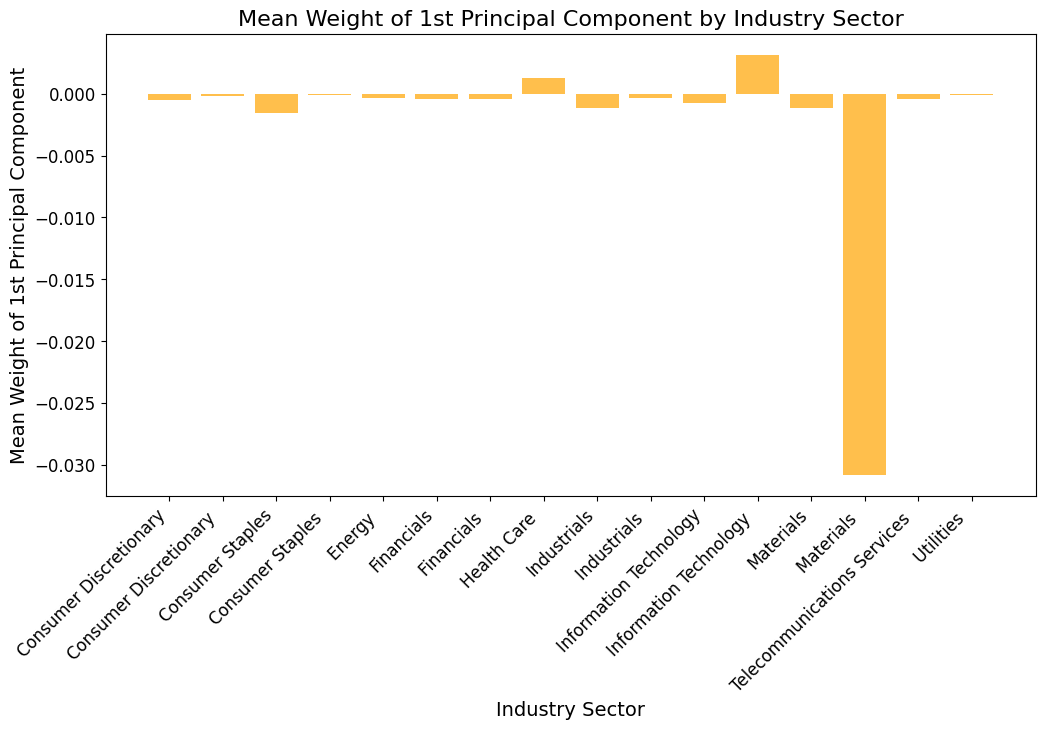

In [ ]:
# Continue from the previous code

# Merge weights_df with ticker_info
weights_df = weights_df.merge(ticker_info[['ticker', 'sector']], left_on='Ticker', right_on='ticker', how='left')

# Drop the duplicate 'ticker' column
weights_df = weights_df.drop(columns='ticker')

# Group weights by sector and calculate mean
mean_weights_by_sector = weights_df.groupby('sector')['Weight_PC1'].mean().reset_index()

# Plot bar plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(mean_weights_by_sector['sector'], mean_weights_by_sector['Weight_PC1'], color='orange', alpha=0.7)
plt.xlabel('Industry Sector', fontsize=14)
plt.ylabel('Mean Weight of 1st Principal Component', fontsize=14)
plt.title('Mean Weight of 1st Principal Component by Industry Sector', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()


1.b.4.: Make a similar plot for the 2nd principal component.  What kind of information do you think does this component reveal? (Hint: look at the signs and magnitudes.)

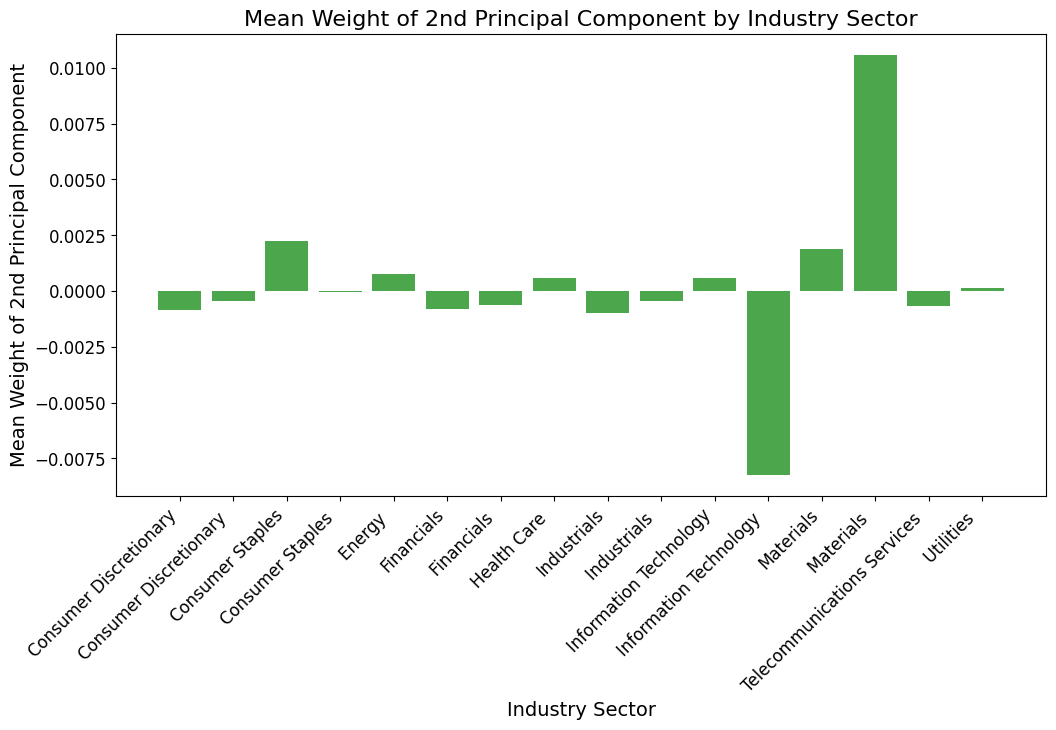

In [ ]:
# Continue from the previous code

# Extract the weights for the 2nd principal component
weights_pc2 = pca.components_[1, :]

# Create a DataFrame to store weights and sector information for the 2nd principal component
weights_df_pc2 = pd.DataFrame({'Ticker': price_data.columns, 'Weight_PC2': weights_pc2})
weights_df_pc2 = weights_df_pc2.merge(ticker_info[['ticker', 'sector']], left_on='Ticker', right_on='ticker', how='left')

# Drop the duplicate 'ticker' column
weights_df_pc2 = weights_df_pc2.drop(columns='ticker')

# Group weights by sector and calculate mean for the 2nd principal component
mean_weights_by_sector_pc2 = weights_df_pc2.groupby('sector')['Weight_PC2'].mean().reset_index()

# Plot bar plot for the 2nd principal component
plt.figure(figsize=(12, 6))
plt.bar(mean_weights_by_sector_pc2['sector'], mean_weights_by_sector_pc2['Weight_PC2'], color='green', alpha=0.7)
plt.xlabel('Industry Sector', fontsize=14)
plt.ylabel('Mean Weight of 2nd Principal Component', fontsize=14)
plt.title('Mean Weight of 2nd Principal Component by Industry Sector', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()


1.c.: Rerun the PCA analysis with the most updated data downloaded from the available stock price API.

1. Fetch Updated Stock Prices:

In [ ]:
!pip install yfinance

1. Fetch Updated Stock Prices:

[*********************100%%**********************]  4 of 4 completed
Explained Variance Ratio
[4.91779910e-01 2.32082370e-01 1.03698165e-01 6.43289076e-02
 3.43290559e-02 2.84429709e-02 2.43360857e-02 1.92409035e-02
 9.31004941e-04 2.40972931e-04 1.70859000e-04 9.89417843e-05
 7.77679024e-05 7.11552980e-05 6.09892325e-05 3.64950692e-05
 2.61555805e-05 2.33716096e-05 1.46659687e-05 9.25317834e-06]


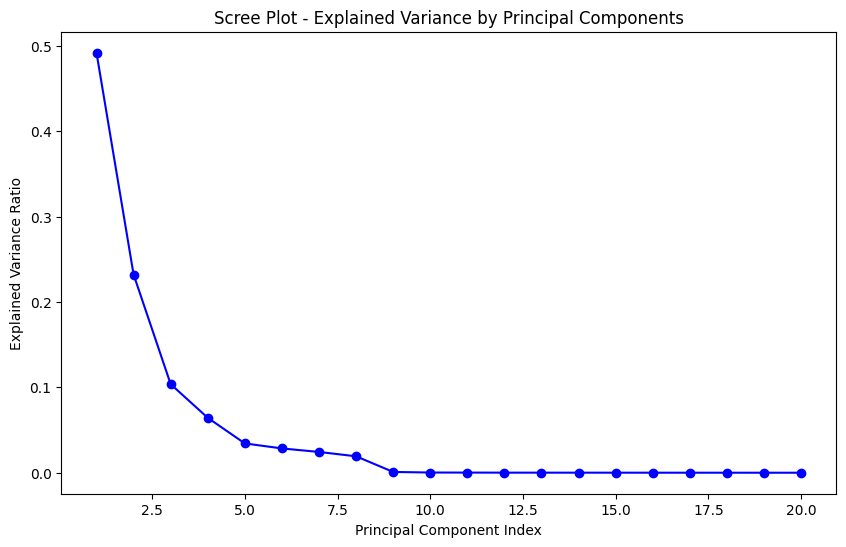

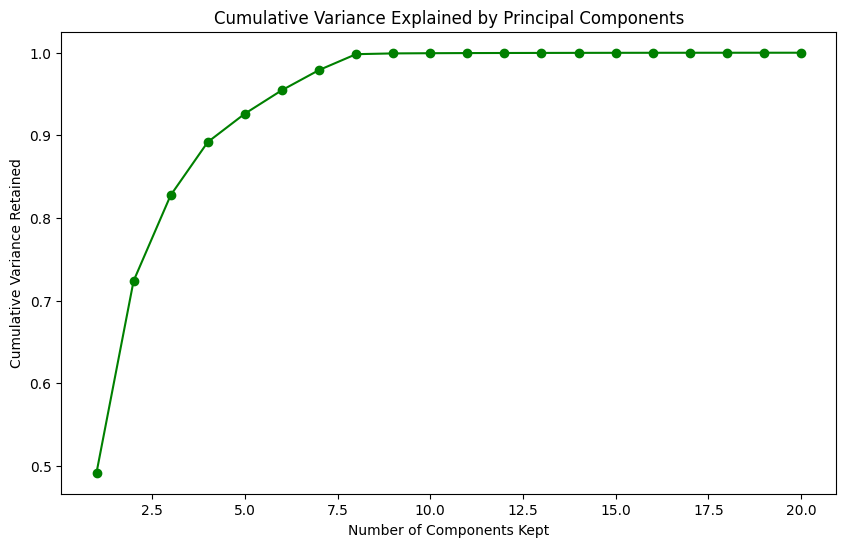

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the list of tickers
tickers = ['AAPL', 'GOOGL', 'AMZN', 'TSLA']

# Define the features to fetch from Yahoo Finance
features = ['Open', 'High', 'Low', 'Close', 'Volume']

# Define the time period
start_date = '2021-01-01'
end_date = '2023-12-15'

# Fetch stock price data from Yahoo Finance
stock_data = yf.download(tickers, start=start_date, end=end_date)[features]

# Drop any missing values
stock_data = stock_data.dropna()

# Standardize the data
standardized_data = (stock_data - stock_data.mean()) / stock_data.std()

# Fit PCA model
pca = PCA()
principal_components = pca.fit_transform(standardized_data)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
print("Explained Variance Ratio")
print(explained_variance_ratio)

# Plot scree plot as a line graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='blue')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - Explained Variance by Principal Components')
plt.show()
print()
# Plot cumulative variance explained
cumulative_var_ratio = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o', linestyle='-', color='green')
plt.xlabel('Number of Components Kept')
plt.ylabel('Cumulative Variance Retained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()


###Problem 2:

2.a.: Wrapper method: Search for the best set of features using backward and forward stepwise regression


In [85]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from itertools import combinations

# Load the data
data = pd.read_csv('/content/gdrive/MyDrive/IS 733 Data Mining/Homework/3/data/BMI.csv')

# Drop rows with missing values
data = data.dropna()

# Define the target variable and features
target_variable = 'fatpctg'
features = [col for col in data.columns if col != target_variable]

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

def backward_stepwise_regression(features, target_variable, data):
    current_features = features.copy()
    best_features = features.copy()

    while len(current_features) > 1:
        mse_list = []

        for feature in current_features:
            features_subset = [f for f in current_features if f != feature]
            X = sm.add_constant(data[features_subset])
            y = data[target_variable]

            model = sm.OLS(y, X).fit()
            y_pred = model.predict(X)
            mse = mean_squared_error(y, y_pred)
            mse_list.append((feature, mse))

        # Find the feature with the lowest MSE
        best_feature, _ = min(mse_list, key=lambda x: x[1])

        # Remove the selected feature from the current set
        current_features.remove(best_feature)

        # Update the best feature set if needed
        if len(current_features) < len(best_features):
            best_features = current_features.copy()

    return best_features

def forward_stepwise_regression(features, target_variable, data):
    current_features = []
    best_features = []

    for _ in range(len(features)):
        mse_list = []

        for feature in features:
            features_subset = current_features + [feature]
            X = sm.add_constant(data[features_subset])
            y = data[target_variable]

            model = sm.OLS(y, X).fit()
            y_pred = model.predict(X)
            mse = mean_squared_error(y, y_pred)
            mse_list.append((feature, mse))

        # Find the feature with the lowest MSE
        best_feature, _ = min(mse_list, key=lambda x: x[1])

        # Add the selected feature to the current set
        current_features.append(best_feature)

        # Update the best feature set if needed
        if len(current_features) > len(best_features):
            best_features = current_features.copy()

    return best_features

# Backward stepwise regression
backward_selected_features = backward_stepwise_regression(features, target_variable, train_data)
print("Features selected using backward stepwise regression:", backward_selected_features)

# Forward stepwise regression
forward_selected_features = forward_stepwise_regression(features, target_variable, train_data)
print("Features selected using forward stepwise regression:", forward_selected_features)


Features selected using backward stepwise regression: ['Abdomen']
Features selected using forward stepwise regression: ['Abdomen', 'Wrist', 'Weight', 'Biceps', 'Age', 'Neck', 'Height', 'Forearm', 'Thigh', 'Hip', 'Chest', 'Ankle', 'Knee']


In [92]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('/content/gdrive/MyDrive/IS 733 Data Mining/Homework/3/data/BMI.csv')

# Define the target variable and features
target_variable = 'fatpctg'
features = [col for col in data.columns if col != target_variable]

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

def backward_stepwise_regression(features, target_variable, data):
    current_features = features.copy()
    best_features = features.copy()

    while len(current_features) > 1:
        mse_list = []

        for feature in current_features:
            features_subset = [f for f in current_features if f != feature]
            X = sm.add_constant(data[features_subset])
            y = data[target_variable]

            model = sm.OLS(y, X).fit()
            y_pred = model.predict(X)
            mse = mean_squared_error(y, y_pred)
            mse_list.append((feature, mse))

        # Find the feature with the lowest MSE
        best_feature, _ = min(mse_list, key=lambda x: x[1])

        # Remove the selected feature from the current set
        current_features.remove(best_feature)

        # Update the best feature set if needed
        if len(current_features) < len(best_features):
            best_features = current_features.copy()

    # Final model with selected features
    final_model = sm.OLS(data[target_variable], sm.add_constant(data[best_features])).fit()

    return best_features, final_model

def forward_stepwise_regression(features, target_variable, data):
    current_features = []
    best_features = []

    for _ in range(len(features)):
        mse_list = []

        for feature in features:
            features_subset = current_features + [feature]
            X = sm.add_constant(data[features_subset])
            y = data[target_variable]

            model = sm.OLS(y, X).fit()
            y_pred = model.predict(X)
            mse = mean_squared_error(y, y_pred)
            mse_list.append((feature, mse))

        # Find the feature with the lowest MSE
        best_feature, _ = min(mse_list, key=lambda x: x[1])

        # Add the selected feature to the current set
        current_features.append(best_feature)

        # Update the best feature set if needed
        if len(current_features) > len(best_features):
            best_features = current_features.copy()

    # Final model with selected features
    final_model = sm.OLS(data[target_variable], sm.add_constant(data[best_features])).fit()

    return best_features, final_model

# Backward stepwise regression
backward_selected_features, backward_final_model = backward_stepwise_regression(features, target_variable, train_data)
print("Features selected using backward stepwise regression:", backward_selected_features)
print("MSE of the final model:", backward_final_model.mse_resid)
print("\nSummary statistics of the final model:")
print(backward_final_model.summary())

# Forward stepwise regression
forward_selected_features, forward_final_model = forward_stepwise_regression(features, target_variable, train_data)
print("\nFeatures selected using forward stepwise regression:", forward_selected_features)
print("MSE of the final model:", forward_final_model.mse_resid)
print("\nSummary statistics of the final model:")
print(forward_final_model.summary())


Features selected using backward stepwise regression: ['Abdomen']
MSE of the final model: 23.819518784496815

Summary statistics of the final model:
                            OLS Regression Results                            
Dep. Variable:                fatpctg   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     419.3
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           7.05e-51
Time:                        01:15:40   Log-Likelihood:                -602.84
No. Observations:                 201   AIC:                             1210.
Df Residuals:                     199   BIC:                             1216.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [

2.b.: Filter method:  output a ranking of features using correlation statistics (i.e. between any of the input variables and output)

In [93]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/gdrive/MyDrive/IS 733 Data Mining/Homework/3/data/BMI.csv')

# Define the target variable and features
target_variable = 'fatpctg'
features = [col for col in data.columns if col != target_variable]

# Calculate the correlation between each feature and the target variable
correlation_ranking = data[features].corrwith(data[target_variable]).abs().sort_values(ascending=False)

# Display the ranking
print("Feature ranking based on correlation with 'fatpctg':")
print(correlation_ranking)


Feature ranking based on correlation with 'fatpctg':
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
dtype: float64


2.c.: Embedded method: (1) Lasso regression; (2) random forest (feature importance ranking)


2.c.1.: Lasso regression

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/gdrive/MyDrive/IS 733 Data Mining/Homework/3/data/BMI.csv')

# Drop rows with missing values
data = data.dropna()

# Define predictors (X) and target variable (y)
X = data.drop(columns=['fatpctg'])
y = data['fatpctg']

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fitting Lasso regression model
lasso_model = Lasso(alpha=0.01)  # Adjust alpha based on your preference
lasso_model.fit(X_scaled, y)

# Getting feature coefficients
lasso_coefficients = pd.Series(lasso_model.coef_, index=X.columns)

# Ranking features based on absolute coefficient values
ranked_features_lasso = lasso_coefficients.abs().sort_values(ascending=False)

# Printing the ranked features
print("Ranking of Features based on Lasso Regression:")
print(ranked_features_lasso)


Ranking of Features based on Lasso Regression:
Abdomen    10.065850
Hip         1.770228
Wrist       1.585667
Weight      1.394999
Neck        1.260492
Thigh       1.235198
Forearm     0.862787
Age         0.858525
Biceps      0.394947
Height      0.317482
Chest       0.302490
Ankle       0.234365
Knee        0.202461
dtype: float64


2.c.2.:  RandomForestRegressor

In [111]:
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_csv('/content/gdrive/MyDrive/IS 733 Data Mining/Homework/3/data/BMI.csv')


# Drop rows with missing values
data = data.dropna()

# Define predictors (X) and target variable (y)
X = data.drop(columns=['fatpctg'])
y = data['fatpctg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the n_estimators parameter

# Fit the model
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance ranking
print('Feature Importance Ranking:')
print(feature_importance_df)


Feature Importance Ranking:
    Feature  Importance
5   Abdomen    0.714957
1    Weight    0.031164
12    Wrist    0.030504
2    Height    0.029040
6       Hip    0.028463
3      Neck    0.026902
4     Chest    0.024049
0       Age    0.023840
9     Ankle    0.019951
10   Biceps    0.019619
8      Knee    0.019410
11  Forearm    0.016606
7     Thigh    0.015493


In [113]:
  %cd '/content/gdrive/MyDrive/IS 733 Data Mining/Homework/3'


/content/gdrive/MyDrive/UMBC/SEM_3/IS 733 Data Mining/Homework/3
